# <center> Aritmética de punto flotante y errores numéricos

Queremos comprender las limitaciones fundamentales de la representación numérica en una computadora. Analizaremos cómo la aritmética de punto flotante se desvía de la aritmética de números reales y cómo estas desviaciones pueden conducir a errores significativos.

## Representación de punto flotante y error de redondeo

En computación, los números reales se aproximan mediante un sistema de punto flotante (definido por el estándar IEEE 754).
Un número se representa como:

$$x = \pm M \times B^{E}$$
ó
$$x = \pm (1. d_1 d_2 d_3 ...) \times 10^{E} $$

Por ejemplo, el número $123.456$ se puede representar como $1.23456 \times 10^{2}$

Debido a que la mantisa y el exponente se almacenan con un número finito de bits, el conjunto de números representables es finito y discreto. Cualquier número real que no pertenezca a este conjunto debe ser redondeado al valor representable más cercano. La diferencia entre el número real y su representación en punto flotante se conoce como **error de redondeo**.

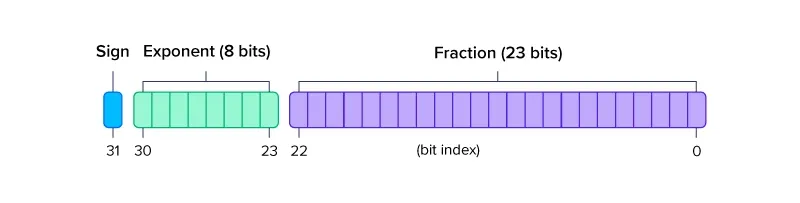

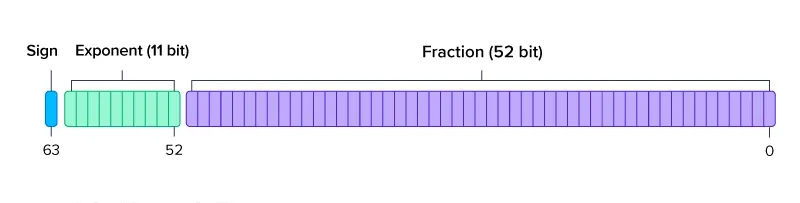

#### Ejemplo: aritmética inexacta

In [1]:
import math

resultado = 0.1 + 0.2

print(f"0.1 + 0.2 = {resultado}")
print(f"¿Es el resultado igual a 0.3? {resultado == 0.3}")

0.1 + 0.2 = 0.30000000000000004
¿Es el resultado igual a 0.3? False


La razón es que 0.1 y 0.2 no tienen una representación binaria finita.

In [2]:
print(f"Representación de 0.1: {0.1:.17f}")
print(f"Representación de 0.2: {0.2:.17f}")
print(f"Representación de 0.3: {0.3:.17f}")

print(resultado == 0.3)

Representación de 0.1: 0.10000000000000001
Representación de 0.2: 0.20000000000000001
Representación de 0.3: 0.29999999999999999
False


Una consecuencia directa del error de redondeo es que operaciones aritméticas básicas pueden no producir el resultado exacto esperado. Además, la comparación directa de números de punto flotante $(a == b)$ es una práctica poco fiable.
La forma matemáticamente robusta de comparar dos flotantes $a$ y $b$ es verificar si su diferencia absoluta es menor que una tolerancia $\tau$:

$$|a-b| < \tau$$

Python tiene una función para este propósito en su módulo *math*, llamada ***isclose()***: https://docs.python.org/3/library/math.html#math.isclose

In [3]:
tol = 1e-9

print(f"Tolerancia manual: {abs(resultado - 0.3) < tol}")
print(f"Usando la función math.isclose: {math.isclose(resultado, 0.3)}")

Tolerancia manual: True
Usando la función math.isclose: True


### 1. Épsilon de la Máquina

El **épsilon de la máquina** ($\epsilon_{mach} = 2^{1-t}$) es un valor que cuantifica la precisión relativa de un sistema de punto flotante. Se define como la diferencia entre 1 y el siguiente número de punto flotante representable mayor que 1.

Formalmente, es el número positivo más pequeño tal que

$$1.0 + \epsilon_{mach} > 1.0$$

en otras palabras, representa la distancia entre 1.0 y el siguiente número representable.

Por otro lado, la **unidad de redondeo** ($\eta$) se define como

$$\eta = \frac{1}{2} \beta^{1-t}$$

y representa el error máximo de redondeo. Cuando un número real cae entre dos números representables, el sistema lo redondea al más cercano. Por lo tanto, el error máximo que se puede cometer es la mitad de la distancia entre ellos.

#### Ejemplo: Determinación del épsilon de la máquina

In [61]:
import sys

# épsilon de la máquina para precisión doble (float de 64 bits)
epsilon = sys.float_info.epsilon
print(f"Épsilon de la máquina (float64): {epsilon}\n")

# demostración de que es quien dice ser
print(f"1.0 + epsilon = {1.0 + epsilon}")
print(f"(1.0 + epsilon > 1.0) = {1.0 + epsilon > 1.0}\n")

print(f"1.0 + epsilon/2 = {1.0 + epsilon/2}")
print(f"(1.0 + epsilon/2 > 1.0) = {1.0 + epsilon/2.0 > 1.0}")

Épsilon de la máquina (float64): 2.220446049250313e-16

1.0 + epsilon = 1.0000000000000002
(1.0 + epsilon > 1.0) = True

1.0 + epsilon/2 = 1.0
(1.0 + epsilon/2 > 1.0) = False


El épsilon de la máquina nos da una cota superior para el error relativo de redondeo. Para cualquier número real $x$, su representación en punto flotante $fl(x)$ satisface:

$$ \frac{|x - fl(x)|}{|x|} \leq \eta$$

### 2. Cancelación Catastrófica

Este es uno de los errores numéricos más graves. Ocurre al restar dos números de magnitud similar y muy cercanos entre sí. Durante la resta, los dígitos significativos principales se cancelan, y el resultado final queda dominado por los errores de redondeo previos, magnificando el error relativo de manera desproporcionada.

#### Ejemplo: Raíces de una ecuación cuadrática

Para la ecuación cuadrática $ax^2 + bx + x = 0$, con $a \neq 0$, la fórmula general para obtener sus raíces es

$$ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Si $b^2 >> 4ac$, entonces $\sqrt{b^2 - 4ac} \approx |b|$

Y si $b>0$, entonces la raíz $x_+ = \frac{-b + \sqrt{b^2 - 4ac}}{2a}$ sufrirá la cancelación catastrófica. Veamos este caso.

Consideremos $a=1$, $b=62.10$, $c=1$

Las soluciones son (aproximadamente):

$$x_1 = -0.01610723$$
$$x_2 =  -62.08390$$

In [39]:
x1_real = -0.01610723
x2_real = -62.08390

In [58]:
a, b, c = 1, 62.10, 1

discriminante = round(math.sqrt(b**2 - 4*a*c), 2)
print(f"√b²-4ac = {discriminante}")
print(f"b = {b:.2f}")
print()

x1_ = (-b + discriminante) / (2*a) #resta que causa cancelación catastrófica
x2_ = (-b - discriminante) / (2*a)
error_relativo_x1_ = abs(x1_real - x1_) / abs(x1_real)
error_relativo_x2_ = abs(x2_real - x2_) / abs(x2_real)

print(f"Raíces con la fórmula estándar:")
print(f"fl(x1_) = {x1_:.5f}")
print(f"fl(x2_) = {x2_:.5f}")
print()
print(f"error relativo x1_ = {error_relativo_x1_:.2%}")
print(f"error relativo x2_ = {error_relativo_x2_:.2%}")

√b²-4ac = 62.07
b = 62.10

Raíces con la fórmula estándar:
fl(x1_) = -0.01500
fl(x2_) = -62.08500

error relativo x1_ = 6.87%
error relativo x2_ = 0.00%


Para evitar la cancelación, podemos utilizar la propiedad de las raíces de Vieta, $x_1 x_2 = \frac{c}{a}$

In [60]:
x2 = (-b - discriminante) / (2*a) 
x1 = c / (a * x2) # Calculamos x1 usando la relación de Vieta

error_relativo_x1 = abs(x1_real - x1) / abs(x1_real)
error_relativo_x2 = abs(x2_real - x2) / abs(x2_real)

print(f"Raíces con la fórmula estable:")
print(f"x1 = {x1:.5f}")
print(f"x2 = {x2:.5f}")
print()
print(f"error relativo x1 = {error_relativo_x1:.2%}")
print(f"error relativo x2 = {error_relativo_x2:.2%}")

Raíces con la fórmula estable:
x1 = -0.01611
x2 = -62.08500

error relativo x1 = 0.00%
error relativo x2 = 0.00%


#### Ejemplo: Cálculo de e^x mediante series de Taylor

La serie de Taylor de la exponencial es $e^x = \sum_{n=0}^\infty \frac{x^n}{n!}$

Esta serie converge para todo $x$. Sin embargo, para valores negativos de $x$ de *gran magnitud* (por ejemplo, $x=−20$), la serie presenta términos alternantes muy grandes que se cancelan para producir un resultado final pequeño. Un caldo de cultivo perfecto para la cancelación catastrófica.

In [37]:
def exp_taylor_(x, terminos=100):
    """Calcula e^x usando una suma directa de la serie de Taylor."""
    resultado = 0.0
    for n in range(terminos):
        resultado += (x**n) / math.factorial(n)
    return resultado

x = -20
valor_real = math.exp(x)
valor_aprox_ = exp_taylor_(x)
error_relativo_ = abs(valor_real - valor_aprox_) / abs(valor_real)

print(f"Valor real: {valor_real}")
print(f"Valor aproximado (inestable): {valor_aprox_}")
print(f"Error relativo (inestable): {error_relativo_:.2%}\n")

Valor real: 2.061153622438558e-09
Valor aproximado (inestable): 5.47810291652921e-10
Error relativo (inestable): 73.42%



Una reformulación matemática que evita este problema es usar la propiedad $e^{-x} = \frac{1}{e^x}$. Para $x<0$, podemos calcular la serie para $|x|$, donde todos los términos son positivos, y luego tomar el inverso.

In [43]:
def exp_taylor(x, terminos=100):
    """Calcula e^x usando una estrategia estable."""
    if x < 0:
        # Evita la cancelación calculando para |x| y tomando el inverso
        return 1.0 / exp_taylor_(abs(x), terminos)
    else:
        return exp_taylor_(x, terminos)

valor_aprox = exp_taylor(x)
error_relativo = abs(valor_real - valor_aprox) / abs(valor_real)

print(f"Valor aproximado (estable): {valor_aprox}")
print(f"Error relativo (estable): {error_relativo:.2%}")

Valor aproximado (estable): 2.0611536224385583e-09
Error relativo (estable): 0.00%


### 3. Visualizando un sistema de punto flotante simplificado

Visualizaremos un sistema de punto flotante "de juguete". Esto nos permitirá ver directamente cómo se distribuyen los números que una computadora hipotética podría representar, y revelando por qué el espaciado entre ellos no es uniforme.

Definimos nuestro sistema con los siguientes parámetros: $(\beta, t, L, U)$

* $\beta = 2$ (base binaria)
* $t = 3$ (precisión de 3 bits para la mantisa, ie., su forma normalizada es $1.d_1 d_2$)
* $L = -2$ (exponente mínimo)
* $U = 3$ (exponente máximo)


De la mantisa $d_0.d_1 d_2$, el número más pequeño es $(1.00)_2 = (1.00)_{10}$ y el más grande es $(1.11)_2 = (1.75)_{10}$

Por lo tanto, recorreremos la mantisa desde $1.00$ hasta $1.75$ en pasos de $\beta^{1-t} = 2^{-2} = 0.25$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parámetros de nuestro sistema de punto flotante de juguete
beta = 2
precision = 3
L = -2
U = 3

# generamos todas las mantisas posibles
mantissas = np.arange(1, 2, 2**-(precision - 1))
# generamos todos los exponentes posibles
exponents = np.arange(L, U + 1)

# generamos todos los números positivos del sistema
positive_numbers = []
for m in mantissas:
    for e in exponents:
        number = m * (beta**float(e))
        positive_numbers.append(number)

# construccion el sistema completo (positivos, negativos y cero)
all_numbers = np.array(positive_numbers)
all_numbers = np.concatenate([-all_numbers, [0], all_numbers])
all_numbers = np.sort(al

In [ ]:
__

Total de números representables en el sistema: 49
Primeros 10 números positivos:
[0.25   0.3125 0.375  0.4375 0.5    0.625  0.75   0.875  1.     1.25  ]


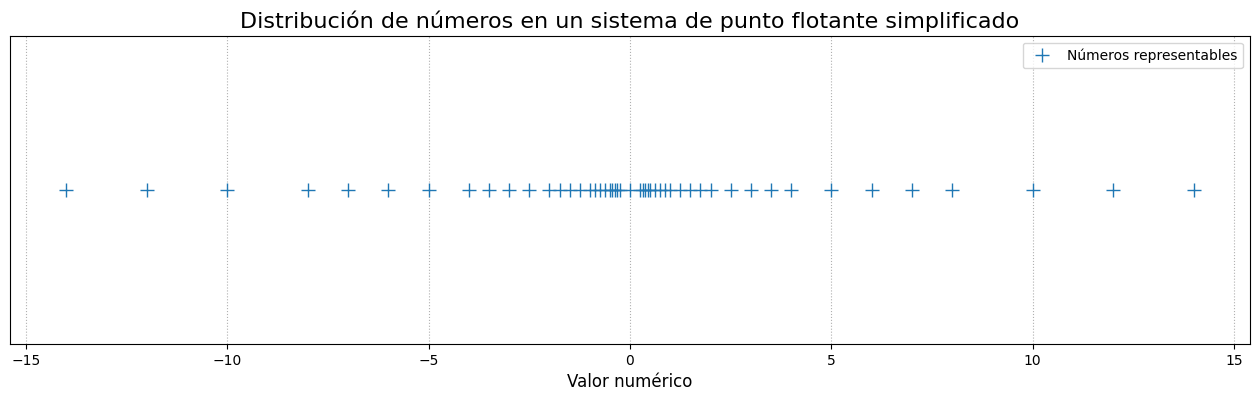

In [ ]:
l_numbers)

print(f"Total de números representables en el sistema: {len(all_numbers)}")
print("Primeros 10 números positivos:")
print(np.unique(np.sort(positive_numbers))[:10])

plt.figure(figsize=(16, 4))
y_zeros = np.zeros_like(all_numbers) #vector de ceros para el eje Y para que los puntos se alineen
plt.plot(all_numbers, y_zeros, '+', markersize=10, label='Números representables')

plt.title('Distribución de números en un sistema de punto flotante simplificado', fontsize=16)
plt.xlabel('Valor numérico', fontsize=12)
plt.yticks([]) # Ocultar el eje Y
plt.grid(True, axis='x', linestyle=':')
plt.legend()
plt.show()

### ¿Qué onda con el espaciado?

In [20]:
import numpy as np

# espaciado alrededor de 1.0
espaciado_1 = np.nextafter(1.0, 2.0) - 1.0
print(f"El siguiente número después de 1.0 es: {np.nextafter(1.0, 2.0):.20f}")
print(f"Espaciado alrededor de 1.0: {espaciado_1:e}")
# Verificamos que es el épsilon de la máquina
print(f"Épsilon de la máquina:      {np.finfo(float).eps:e}\n")
print()

# espaciado alrededor de 100,000
espaciado_100k = np.nextafter(num, num + 1) - num
print(f"El siguiente número después de 100000.0 es: {np.nextafter(num, num + 1):.20f}")
print(f"Espaciado alrededor de 100000.0: {espaciado_100k:e}")
print()

# comparamos la relación
print(f"El espaciado en 100,000 es {espaciado_100k / espaciado_1:,.0f} veces más grande que en 1.0")

El siguiente número después de 1.0 es: 1.00000000000000022204
Espaciado alrededor de 1.0: 2.220446e-16
Épsilon de la máquina:      2.220446e-16


El siguiente número después de 100000.0 es: 100000.00000000001455191523
Espaciado alrededor de 100000.0: 1.455192e-11

El espaciado en 100,000 es 65,536 veces más grande que en 1.0


## Clasificación de errores

En el mundo de las matemáticas puras, trabajamos con números y operaciones exactas. Sin embargo, en el análisis numérico esta exactitud se pierde. La discrepancia entre la solución matemática exacta y el resultado obtenido computacionalmente se conoce como **error numérico**.

Prácticamente todos los errores numéricos se pueden clasificar en dos categorías principales: **errores de redondeo** y **errores de truncamiento**.

### 1. Errores de redondeo <small> (rounding errors)

Estos errores son una consecuencia directa de la forma en que las computadoras representan los números. Su origen viene de la limitación fundamental de que las computadoras utilizan una cantidad finita de bits para almacenar números reales, que son por naturaleza infinitos y continuos.

Sus características clave son:

* Inherente a la máquina: No depende del algoritmo que uses, sino de la arquitectura del hardware y la precisión con la que trabajas.
* Inevitable: Ocurre incluso en la representación de números aparentemente sencillos (como 0.1) o en operaciones aritméticas básicas.
* Naturaleza estocástica: Su comportamiento a menudo parece aleatorio o ruidoso.

#### Ejemplo: Naturaleza estocástica del error de redondeo

El objetivo es demostrar que este tipo de error no sigue un patrón suave, sino que se comporta de manera similar a un ruido aleatorio.

Para ello, consideramos la función
$$g(t) = e^{-t} \sin(2 \pi t) + 2$$

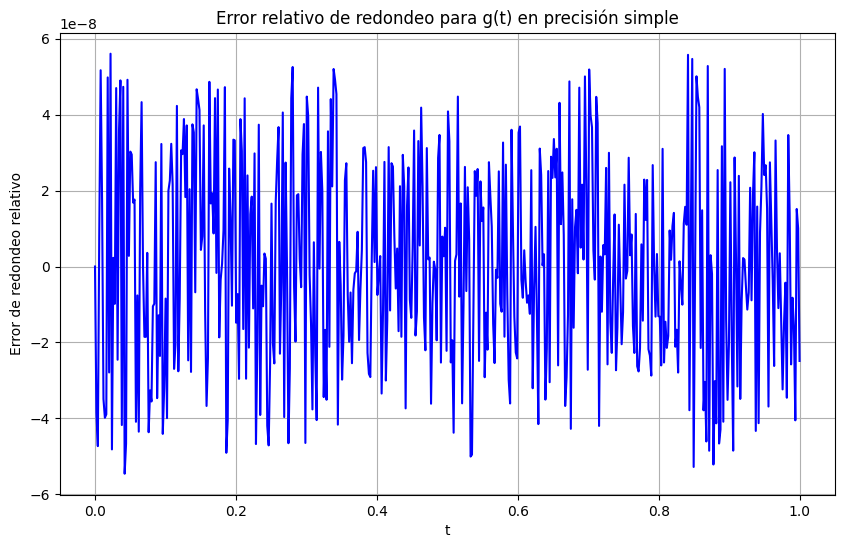

Épsilon para precisión simple (float32): 1.192093e-07
Unidad de redondeo: 5.960464e-08
Máximo error relativo observado: 5.803967e-08
Relación (máximo error / eta): 0.9403
Este valor cercano a 1 confirma que el error de redondeo está acotado por la unidad de redondeo.


In [10]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 500)

# función g(t) = e^(-t) * (sin(2*pi*t) + 2)
def g(t):
    return np.exp(-t) * (np.sin(2 * np.pi * t) + 2)

# función en doble precisión (float64, por defecto en NumPy)
g_double = g(t)
# función en precisión simple (float32), convertimos el resultado de float64 a float32
g_single = g_double.astype(np.float32)
# error de redondeo relativo
roundoff_error = (g_double - g_single) / g_double

plt.figure(figsize=(10, 6))
plt.plot(t, roundoff_error, 'b-')
plt.title('Error relativo de redondeo para g(t) en precisión simple')
plt.xlabel('t')
plt.ylabel('Error de redondeo relativo')
plt.grid(True)
plt.show()

# --- Verificación Teórica ---
# unidad de redondeo 'eta' en precisión simple (float32)
epsilon_single = np.finfo(np.float32).eps
eta = epsilon_single / 2

# máximo error relativo observado en nuestro experimento
max_error = np.max(np.abs(roundoff_error))

print(f"Épsilon para precisión simple (float32): {epsilon_single:e}")
print(f"Unidad de redondeo: {eta:e}")
print(f"Máximo error relativo observado: {max_observed_error:e}")
print(f"Relación (máximo error / eta): {max_error / eta:.4f}")
print("Este valor cercano a 1 confirma que el error de redondeo está acotado por la unidad de redondeo.")

Vemos que
* El error no es una curva suave ni sigue un patrón predecible
* Se comporta como ruido de alta frecuencia, oscilando de forma caótica
* La magnitud máxima de este error relativo está limitada por la unidad de redondeo en la precisión que se está estudiando

### 2. Errores de truncamiento <small> (truncation errors)

Surgen cuando aproximamos un proceso matemático infinito con uno finito. El nombre viene de la idea de que estamos *truncando* o cortando un proceso que teóricamente debería continuar. Tiene origen de la necesidad de utilizar un algoritmo aproximado en lugar de un procedimiento matemático exacto.

Sus características clave son:

* Inherente al algoritmo: Este error es una propiedad del método numérico que elegimos, no de la computadora.
* Controlable (en teoría): Generalmente, podemos reducir el error de truncamiento realizando más cálculos; por ejemplo, tomando más términos en la serie de Taylor, o usando un paso de tiempo más pequeño en la solución de una ecuación diferencial.
* Naturaleza sistemática: A diferencia del error de redondeo, el error de truncamiento suele ser predecible y suave.